In [1]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
WNlemma = nltk.WordNetLemmatizer()
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#importing the data
data = pd.read_csv('fake_job_postings.csv')
target = data['fraudulent']

## Exploratory Data Analysis

In [4]:
print((data.isna().sum()/len(data))*100)
#drop department and salary_range because it have about 60 persent null values and removing irrelavent data from the dataset
data.drop(['job_id','salary_range','department','benefits'],axis=1,inplace=True)

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64


In [5]:
data.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


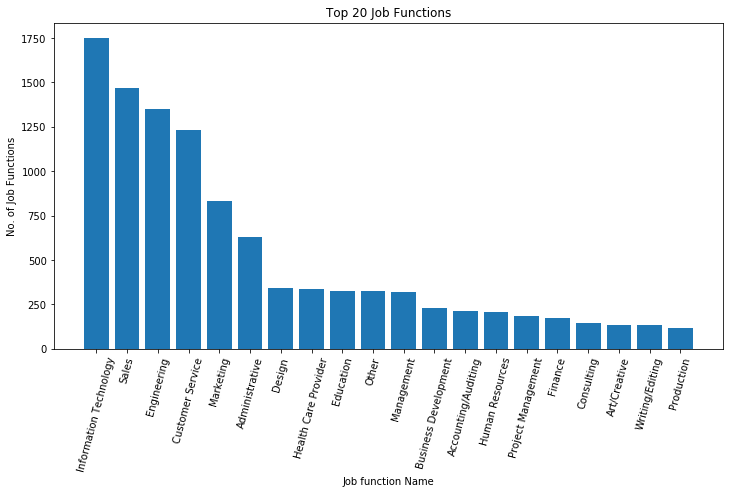

In [6]:
#Plotting the bar plot jobs funtion counts
plt.figure(figsize=(12,6))
plt.bar(data.function.value_counts().index[:20],data.function.value_counts()[:20])
plt.title('Top 20 Job Functions')
plt.xlabel('Job function Name')
plt.ylabel("No. of Job Functions")
degrees = 75
plt.xticks(rotation=degrees)
plt.show()

Text(0, 0.5, 'Industry Name')

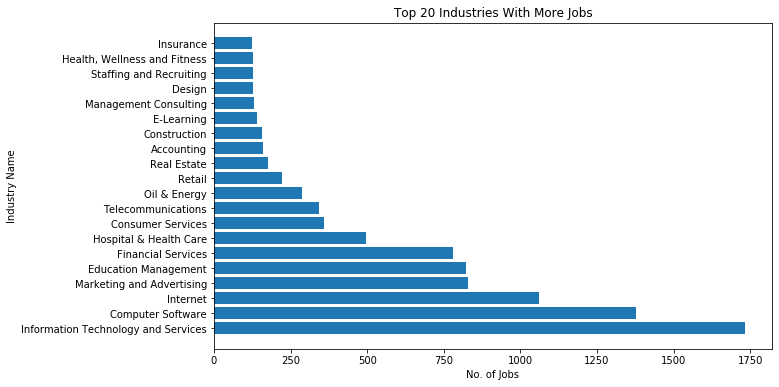

In [7]:
#plot top 20 industries which give most of job posting
plt.figure(figsize=(10,6))
plt.barh(data.industry.value_counts()[:20].index,data.industry.value_counts()[:20])
plt.title('Top 20 Industries With More Jobs')
plt.xlabel('No. of Jobs')
plt.ylabel("Industry Name")

In [8]:
#separate both data to analyse them
fradulent_data = data[data.fraudulent==1]
non_fradulent_data = data[data.fraudulent==0]

print('Number of fake Job description: ',len(fradulent_data))
print('Number of correct job description: ',len(non_fradulent_data))

Number of fake Job description:  866
Number of correct job description:  17014


In [9]:
#Missing values in fake jobs data
fradulent_data.isna().sum()/866*100

title                   0.000000
location                2.193995
company_profile        67.782910
description             0.115473
requirements           17.782910
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        27.829099
required_experience    50.230947
required_education     52.078522
industry               31.755196
function               38.914550
fraudulent              0.000000
dtype: float64

In [10]:
#missing values in correct jobs
non_fradulent_data.isna().sum()/len(non_fradulent_data)*100

title                   0.000000
location                1.921947
company_profile        15.992712
description             0.000000
requirements           14.934760
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        18.984366
required_experience    38.879746
required_education     44.986482
industry               27.201128
function               35.958622
fraudulent              0.000000
dtype: float64

In [11]:
#removing target values form dataset
data.drop(['fraudulent'],axis=1,inplace=True)

In [12]:
data.columns

Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

# Cleaning and preprocessing the data

In [13]:
import re
def remove_links(text):
    text  = re.sub(r'http://[\w|\S]+',' ',str(text))
    return text

In [14]:
def lower_text(text):
    text = str(text)
    text = ' '.join(x.lower() for x in text.split())
    return text

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
def remove_stopWords(text):
    text = str(text)
    text = ''.join( x for x in text if x.split() not in stop)
    return(text)

In [16]:
def remove_non_imp_words(series):
    most_freq = pd.Series(' '.join(series).split()).value_counts()[:30]
    less_freq = pd.Series(' '.join(series).split()).value_counts()[-30:]
    series = series.apply(lambda x: " ".join(x for x in x.split() if x not in most_freq))
    series = series.apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))
    return series

def remove_nan(text):
    if text == 'nan' or text == '':
        text = 'not given'
    return text

In [17]:
def data_cleaning(feature):
    feature = feature.apply(lambda x : remove_links(x))
    feature = feature.apply(lambda x : lower_text(x))
    feature = feature.apply(lambda x : remove_stopWords(x))
    feature = feature.str.replace('[^\w\s]',' 111')
    feature = remove_non_imp_words(feature)
    feature = feature.apply(lambda x: ' '.join([WNlemma.lemmatize(word) for word in x.split()]))
    feature = feature.apply(lambda x : remove_nan(x))
    return feature


In [19]:
#filling null values 
data['required_education'].fillna('no_info_about_education',inplace = True)
data['employment_type'].fillna('no_info_about_employment',inplace = True)
data['required_experience'].fillna('experience_not_asked',inplace = True)
data['industry'].fillna('industry_not_given',inplace = True)
data['function'].fillna('function_not_given',inplace = True)

In [20]:
#dealing with company profile feature
for i in range(len(data.company_profile)):
    if data.company_profile[i]=='NaN':
        data.company_profile[i] = 'company_profile_not_given'
    else:
        data.company_profile[i] = 'company_profile_given'

C:\Users\Pranjal Soni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#dealing catogorical data
cat_cols = ['employment_type','required_experience','required_education','industry','function','company_profile']
for c in cat_cols:
    encoded = pd.get_dummies(data[c])
    data = pd.concat([data,encoded],axis = 1 )
cat_cols = ['employment_type','required_experience','required_education','industry','function','title','location','company_profile']
data.drop(cat_cols,axis=1,inplace=True)

In [22]:
#dealing with text data
description = data['description']+ ' ' +  data['requirements']
description = data_cleaning(description)

In [23]:
tfidf = TfidfVectorizer( min_df = 0.05, ngram_range=(1,3))
tfidf_features = tfidf.fit_transform(description) 
tfidf_vect_df = pd.DataFrame(tfidf_features.todense(), columns = tfidf.get_feature_names())
data = pd.concat([data, tfidf_vect_df], axis = 1)
data.drop(['description','requirements'],axis = 1 , inplace = True)

In [25]:
data.shape

(17880, 727)

In [24]:
data.head()

,telecommuting,has_company_logo,has_questions,Contract,Full-time,Other,Part-time,Temporary,no_info_about_employment,Associate,...,word,working,world,would,writing,written,written communication,written verbal,year,your
0,0,1,0,0,0,1,0,0,0,0,...,0.0,0.133523,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0,1,0,0,1,0,0,0,0,0,...,0.0,0.067582,0.245470,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.034339
2,0,1,0,0,0,0,0,0,1,0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0,1,0,0,1,0,0,0,0,0,...,0.0,0.000000,0.094934,0.0,0.0,0.039119,0.0,0.060263,0.054795,0.099603
4,0,1,1,0,1,0,0,0,0,0,...,0.0,0.052445,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.043980,0.000000


# Applying different classification algorithms

In [26]:
from sklearn.model_selection import train_test_split
X = data
y = np.array(target)
y = y.reshape((17880,))

In [24]:
X = X.to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score ,precision_score,recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [25]:
rf_clf = RandomForestClassifier(n_jobs=-1)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for train_ix, test_ix in kfold.split(X, y):
    #select rows
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
    #fit the model with training data
    rf_clf.fit(train_X,train_y)
    
    y_train_pred = rf_clf.predict(train_X)
    y_test_pred = rf_clf.predict(test_X)
    #evalute the model
    print('Train Data Accuracy : ',accuracy_score(train_y,y_train_pred))
    print('Test Data Accuracy : ',accuracy_score(test_y,y_test_pred))
    
    print()
    print('Confusion Matrix of Train Data : ',confusion_matrix(train_y,y_train_pred))
    print('Confusion Matrix of Test Data : ',confusion_matrix(test_y,y_test_pred))
    print()
    #pricision and recall for test and train data
    print('Train Data Precision : ',precision_score(train_y,y_train_pred))
    print('Test Data Precision : ',precision_score(test_y,y_test_pred))
    print()
    print('Train Data Recall : ',recall_score(train_y,y_train_pred))
    print('Test Data Recall : ',recall_score(test_y,y_test_pred))
    print()

>Train: 0=13611, 1=693, Test: 0=3403, 1=173
Train Data Accuracy :  0.9964345637583892
Test Data Accuracy :  0.9773489932885906

Confusion Matrix of Train Data :  [[13611     0]
 [   51   642]]
Confusion Matrix of Test Data :  [[3402    1]
 [  80   93]]

Train Data Precision :  1.0
Test Data Precision :  0.9893617021276596

Train Data Recall :  0.9264069264069265
Test Data Recall :  0.5375722543352601

>Train: 0=13611, 1=693, Test: 0=3403, 1=173
Train Data Accuracy :  0.9964345637583892
Test Data Accuracy :  0.9756711409395973

Confusion Matrix of Train Data :  [[13610     1]
 [   50   643]]
Confusion Matrix of Test Data :  [[3403    0]
 [  87   86]]

Train Data Precision :  0.9984472049689441
Test Data Precision :  1.0

Train Data Recall :  0.9278499278499278
Test Data Recall :  0.49710982658959535

>Train: 0=13611, 1=693, Test: 0=3403, 1=173
Train Data Accuracy :  0.9969938478747203
Test Data Accuracy :  0.9765100671140939

Confusion Matrix of Train Data :  [[13610     1]
 [   42   65

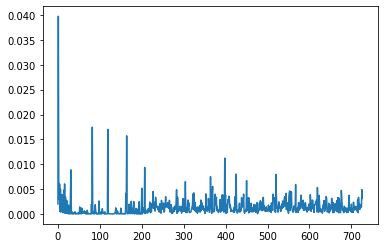

In [26]:
plt.plot(rf_clf.feature_importances_)

In [53]:
imp_features = rf_clf.feature_importances_>0.003

In [54]:
imp_feature_indexes = []
for i in range(len(imp_features)):
    if imp_features[i] == True:
        imp_feature_indexes.append(i)

In [55]:
for i in imp_feature_indexes:
    print(data.columns[i],end=" ,")
print(len(imp_feature_indexes))

has_company_logo ,has_questions ,Full-time ,Other ,Part-time ,no_info_about_employment ,Associate ,Entry level ,Executive ,Internship ,Mid-Senior level ,experience_not_asked ,Associate Degree ,Master's Degree ,Unspecified ,Vocational - Degree ,no_info_about_education ,Airlines/Aviation ,Automotive ,Biotechnology ,Chemicals ,Civil Engineering ,Computer Hardware ,Defense & Space ,Events Services ,Executive Office ,Health, Wellness and Fitness ,Higher Education ,Hospital & Health Care ,Information Technology and Services ,Insurance ,Internet ,Law Enforcement ,Libraries ,Mechanical or Industrial Engineering ,Media Production ,Mental Health Care ,Military ,Nanotechnology ,Online Media ,Outsourcing/Offshoring ,Performing Arts ,Program Development ,Public Policy ,Public Safety ,Ranching ,Religious Institutions ,Renewables & Environment ,Research ,Semiconductors ,Shipbuilding ,Translation and Localization ,Utilities ,Warehousing ,Writing and Editing ,industry_not_given ,Accounting/Auditing ,Bu

In [22]:
data.columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'Contract',
       'Full-time', 'Other', 'Part-time', 'Temporary', 'no info', 'Associate',
       ...
       'word', 'working', 'world', 'would', 'writing', 'written',
       'written communication', 'written verbal', 'year', 'your'],
      dtype='object', length=726)

In [58]:
from sklearn.feature_selection import SelectFromModel

rf_clf = RandomForestClassifier(n_jobs=-1)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for train_ix, test_ix in kfold.split(X, y):
    #select rows
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
    #fit the model with training data
    rf_clf.fit(train_X,train_y)
    
    #feature_selection
    sfm = SelectFromModel(rf_clf,threshold=0.003)
    sfm.fit(train_X, train_y)
    
    X_important_train = sfm.transform(train_X)
    X_important_test = sfm.transform(test_X)
    
    rf_clf = RandomForestClassifier(n_jobs=-1)
    rf_clf.fit(X_important_train, train_y)
    y_train_pred = rf_clf.predict(X_important_train)
    y_test_pred = rf_clf.predict(X_important_test)
    #evalute the model
    print('Train Data Accuracy : ',accuracy_score(train_y,y_train_pred))
    print('Test Data Accuracy : ',accuracy_score(test_y,y_test_pred))
    
    print()
    print('Confusion Matrix of Train Data : ',confusion_matrix(train_y,y_train_pred))
    print('Confusion Matrix of Test Data : ',confusion_matrix(test_y,y_test_pred))
    print()
    #pricision and recall for test and train data
    print('Train Data Precision : ',precision_score(train_y,y_train_pred))
    print('Test Data Precision : ',precision_score(test_y,y_test_pred))
    print()
    print('Train Data Recall : ',recall_score(train_y,y_train_pred))
    print('Test Data Recall : ',recall_score(test_y,y_test_pred))
    print()

>Train: 0=13611, 1=693, Test: 0=3403, 1=173
Train Data Accuracy :  0.9953859060402684
Test Data Accuracy :  0.9765100671140939

Confusion Matrix of Train Data :  [[13611     0]
 [   66   627]]
Confusion Matrix of Test Data :  [[3401    2]
 [  82   91]]

Train Data Precision :  1.0
Test Data Precision :  0.978494623655914

Train Data Recall :  0.9047619047619048
Test Data Recall :  0.5260115606936416

>Train: 0=13611, 1=693, Test: 0=3403, 1=173
Train Data Accuracy :  0.9951062639821029
Test Data Accuracy :  0.9773489932885906

Confusion Matrix of Train Data :  [[13608     3]
 [   67   626]]
Confusion Matrix of Test Data :  [[3400    3]
 [  78   95]]

Train Data Precision :  0.9952305246422893
Test Data Precision :  0.9693877551020408

Train Data Recall :  0.9033189033189033
Test Data Recall :  0.5491329479768786

>Train: 0=13611, 1=693, Test: 0=3403, 1=173
Train Data Accuracy :  0.9954558165548099
Test Data Accuracy :  0.9779082774049217

Confusion Matrix of Train Data :  [[13608     3]

In [59]:
for feature_list_index in sfm.get_support(indices=True):
    print(data.columns[feature_list_index],end= ", ")

has_company_logo, has_questions, Full-time, Part-time, no_info_about_employment, Entry level, Mid-Senior level, experience_not_asked, Bachelor's Degree, High School or equivalent, no_info_about_education, Accounting, Hospital & Health Care, Oil & Energy, industry_not_given, Administrative, function_not_given, 111amp, 111time, ability, any, at, call, can, communication, company, computer, control, data, duty, engineering, environment, equipment, excel, field, follow, from, full, get, high, home, include, industry, information, internet, job, looking, maintenance, manager, must, no, not, office, own, per, perform, phone, position, process, product, project, required, school diploma, seeking, service, standard, start, system, this, time, timely, word, year, your, 

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from math import log
MOD = RandomForestClassifier(n_jobs=-1) 
#Implement RandomSearchCV
m_params = { 
            "RF": {
                    "n_estimators" : np.linspace(100, 500,50, dtype = "int"),  
                    "max_depth": [5, 20, 30, None], 
                    "min_samples_split": np.linspace(2, 50, 50, dtype = "int"),  
                    "max_features": ["sqrt", "log2",10, 20, None],
                    "oob_score": [True],
                    "bootstrap": [True]
                    },
            }
scoreFunction = {"recall": "recall", "precision": "precision"}
random_search = RandomizedSearchCV(MOD,
                                   param_distributions = m_params["RF"], 
                                   n_iter = 20,
                                   scoring = scoreFunction,               
                                   refit = "recall",
                                   return_train_score = True,
                                   random_state = 42,
                                   cv = 5) 

#trains and optimizes the model
random_search.fit(train_X, train_y)
#recover the best model
MOD = random_search.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

In [61]:
fake_jobs = 

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
Financial Services                      779
Hospital & Health Care                  497
Consumer Services                       358
Telecommunications                      342
Oil & Energy                            287
Retail                                  223
Real Estate                             175
Accounting                              159
Construction                            158
E-Learning                              139
Management Consulting                   130
Design                                  129
Staffing and Recruiting                 127
Health, Wellness and Fitness            127
Insurance                               123
Name: industry, dtype: int64

In [32]:
MOD.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=44,
                       min_weight_fraction_leaf=0.0, n_estimators=459,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [34]:
y_train_pred = MOD.predict(train_X)
y_test_pred = MOD.predict(test_X)
#evalute the model
print('Train Data Accuracy : ',accuracy_score(train_y,y_train_pred))
print('Test Data   : ',accuracy_score(test_y,y_test_pred))

print()
print('Confusion Matrix of Train Data : ',confusion_matrix(train_y,y_train_pred))
print('Confusion Matrix of Test Data : ',confusion_matrix(test_y,y_test_pred))
print()
#pricision and recall for test and train data
print('Train Data Precision : ',precision_score(train_y,y_train_pred))
print('Test Data Precision : ',precision_score(test_y,y_test_pred))
print()
print('Train Data Recall : ',recall_score(train_y,y_train_pred))
print('Test Data Recall : ',recall_score(test_y,y_test_pred))
print()

Train Data Accuracy :  0.9801454138702461
Test Data   :  0.9686800894854586

Confusion Matrix of Train Data :  [[13590    22]
 [  262   430]]
Confusion Matrix of Test Data :  [[3385   17]
 [  95   79]]

Train Data Precision :  0.9513274336283186
Test Data Precision :  0.8229166666666666

Train Data Recall :  0.6213872832369942
Test Data Recall :  0.4540229885057471



In [5]:
pd.read_csv('./inputs/oversampled_train.csv').head(100)

,telecommuting,has_company_logo,has_questions,Contract,Full-time,Other,Part-time,Temporary,no_info_about_employment,Associate,...,working,world,would,writing,written,written communication,written verbal,year,your,fraudulent
0,0,1,0,0,0,0,1,0,0,0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
1,0,0,1,0,1,0,0,0,0,0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.035676,0.000000,0
2,1,1,1,0,0,0,0,0,1,0,...,0.057891,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.048546,0.000000,0
3,0,1,0,0,1,0,0,0,0,0,...,0.000000,0.00000,0.0,0.000000,0.089392,0.000000,0.0,0.125214,0.151737,0
4,0,1,1,0,0,0,0,0,1,0,...,0.160310,0.00000,0.0,0.000000,0.095974,0.073133,0.0,0.033608,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,0,1,0,0,0,0,0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
96,0,1,1,0,0,0,0,0,1,0,...,0.000000,0.00000,0.0,0.117469,0.174152,0.000000,0.0,0.060985,0.000000,0
97,0,1,1,0,1,0,0,0,0,0,...,0.099678,0.07241,0.0,0.080503,0.000000,0.000000,0.0,0.041794,0.000000,0
98,0,1,1,0,0,0,0,0,1,0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
